## ex12-Bonus: Interactive with Pandas

In the previous notebooks, we praticed basic SQL syntax with sql% (SQL magic) just like using a command line tool. In fact, SQL magic has a nice integration with pandas library. Result from SQL query can be converted to regular pandas data frame via DataFrame call. After retrieving data into a Pandas DataFrame, we can do more Exploratory Data Analysis. However, that is another story beyond the scope of SQL itself.

In [1]:
%load_ext sql

### 1. Load all needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

### 2. Read the table of rch in the demo.db3

#### 2.1 Connect database

In [3]:
%sql sqlite:///data/demo.db3

u'Connected: @data/demo.db3'

#### 2.2 Save query into a variable

In [4]:
%%sql sqlres << 
SELECT RCH, YR, MO, FLOW_OUTcms 
FROM rch

 * sqlite:///data/demo.db3
Done.
Returning data to local variable sqlres


#### 2.3 Retrieve dataframe from query results

In [5]:
df = sqlres.DataFrame()
df.head()

,RCH,YR,MO,FLOW_OUTcms
0,1,1981,1,146.252487
1,2,1981,1,96.182854
2,3,1981,1,11.861368
3,4,1981,1,49.406513
4,5,1981,1,272.106018


### 3. Further process with Pandas

#### 3.1 Custom quarters definition

In [6]:
quarters = {1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA',
            7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'}

#### 3.2 Carry out seasonal statistics for each reach

In [7]:
df = df.set_index(['MO'])
ssndf = df.groupby(['RCH',quarters])['FLOW_OUTcms'].mean()
ssndf.head(5)

RCH     
1    DJF      99.204991
     JJA    1405.262298
     MAM     559.746932
     SON     454.737985
2    DJF      56.328539
Name: FLOW_OUTcms, dtype: float64

#### Reset index

In [8]:
ssndf = ssndf.reset_index()
ssndf.set_index(['RCH'])
ssndf.head(5)

,RCH,level_1,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


In [9]:
ssndf = ssndf.rename(index=str, columns={"level_1":"SSN"})
ssndf.head(5)

,RCH,SSN,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


#### Convert data into pivoted table

In [10]:
pivoted = ssndf.pivot(index='RCH', columns='SSN', values='FLOW_OUTcms')
pivoted.head()

SSN,DJF,JJA,MAM,SON
RCH,,,,
1,99.204991,1405.262298,559.746932,454.737985
2,56.328539,773.664280,203.242828,297.934326
3,32.838328,166.310382,379.771358,27.425488
4,28.384519,619.184517,278.996801,155.766145
5,336.824441,1635.518864,1215.423962,499.265579


### 4. Visualize
Set some parameters to make figure pretty

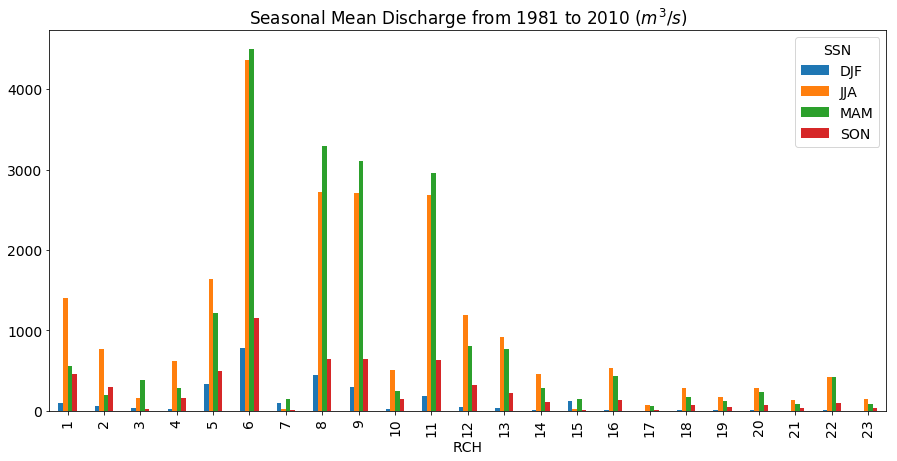

In [11]:
# Plot size to 15" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

pivoted.plot(kind='bar', title='Seasonal Mean Discharge from 1981 to 2010 ($m^3/s$)')

### Summary


In this tutorial we have seen how easy it is to link a SQLite database operations to Pandas via sql%. Moreover, we use Python tools such as Pandas do more further analysis after retrieving data.